# TITLE: 🏡HOUSE PRICES PREDICTION(**Kagggle competition**))

# INTRODUCTION
- The **goal** of this project is **to train a model to  predit the house prices based on the various attributes** of the house.
- Our target is `Saleprice`

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the train dataset
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#loading the test dataset
test=pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# lets see the shape of the dataset
print("The shape of the dataset is",df.shape)

The shape of the dataset is (1460, 81)


- **The dataset has 1460 rows and 81 columns**

In [7]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# statistical info about the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EXPLORATORY DATA ANALYSIS

In [9]:
#lets see the columns we got
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

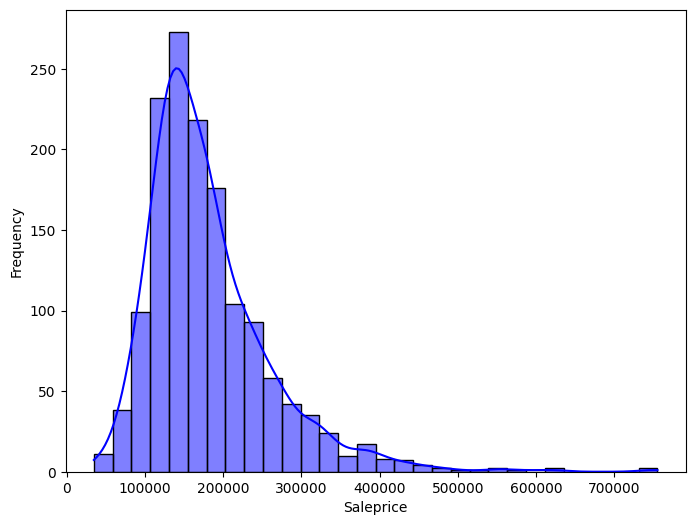

In [10]:
#SalePrice distribution
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'],kde=True,bins=30,color="blue")
plt.xlabel("Saleprice")
plt.ylabel("Frequency")
plt.show()

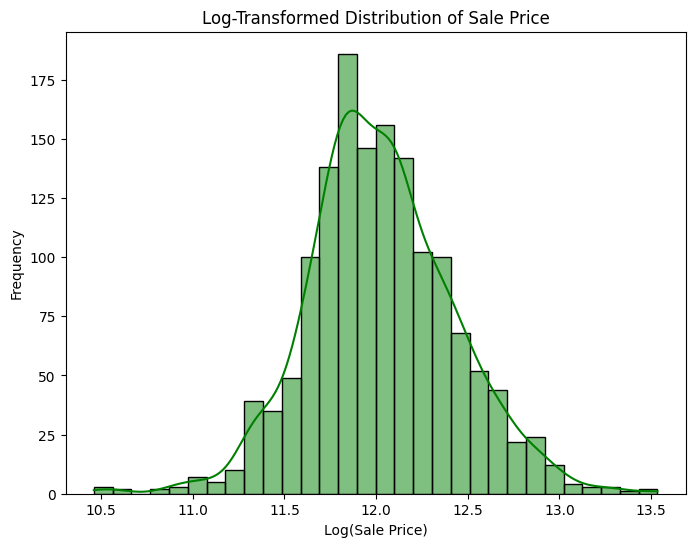

In [11]:
# Log-transformed distribution
plt.figure(figsize=(8,6))
sns.histplot(np.log1p(df["SalePrice"]), kde=True, bins=30, color="green")
plt.title("Log-Transformed Distribution of Sale Price")
plt.xlabel("Log(Sale Price)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Win\AppData\Local\Temp\ipykernel_15576\875534873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="OverallQual", y="SalePrice", data=df, palette="coolwarm")


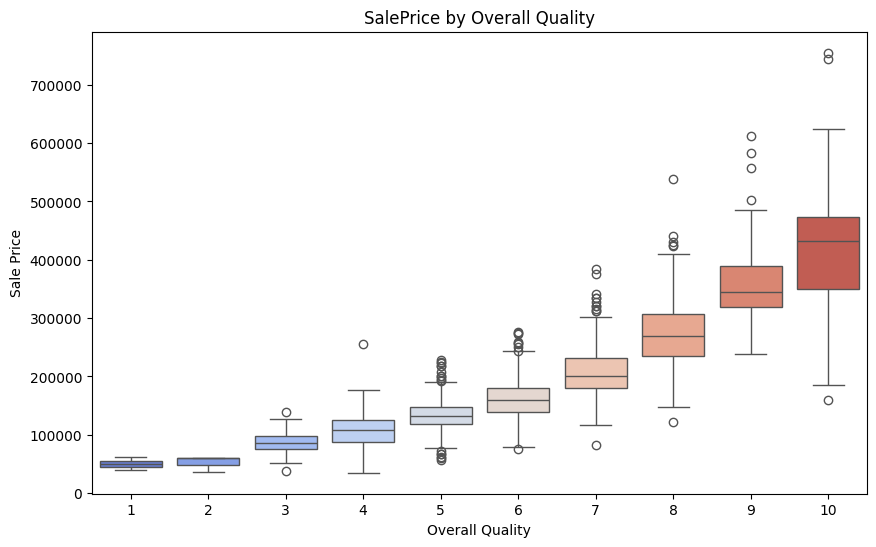

In [12]:
#SalePrice by overallQual
plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=df, palette="coolwarm")
plt.title("SalePrice by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()



# DATA CLEANINING/PREPROCCEING

In [13]:
#checking for duplicates
df.duplicated().sum()

0

- **we have no duplicates**

In [14]:
#Checking for null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
#indentifying categorical columns
cat_cols=df.select_dtypes(include=["object"]).columns
print(len(cat_cols), "categorical columns")

0 categorical columns


In [22]:
# Only apply to existing object columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.strip()
    # Only apply to existing object columns
cat_cols = test.select_dtypes(include=['object']).columns
for col in cat_cols:
    test[col] = test[col].str.strip()



In [23]:
#lets fiil the missing categorical values
for col in cat_cols:
    # Fill missing values and strip spaces
    df[col] = df[col].fillna("missing").astype(str).str.strip()
    test[col] = test[col].fillna("missing").astype(str).str.strip()

In [24]:
#lets see how it is now
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [25]:
#lets encode all the categorical variables at once using one-hot encoding
df=pd.get_dummies(df,columns=cat_cols)
test=pd.get_dummies(test,columns=cat_cols)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(pd.concat([df[cat_cols], test[cat_cols]], axis=0))
df[cat_cols] = enc.transform(df[cat_cols])
test[cat_cols]  = enc.transform(test[cat_cols])


In [27]:
# Align train/test so they have the same columns
df, test = df.align(test, join='left', axis=1, fill_value=0)

In [28]:
df.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 305, dtype: int64

In [29]:
#lets see how many numerical columns have missing values
num_cols=df.select_dtypes(include=['int64','float64'])
missing_num=num_cols.isnull().sum()
missing_num=missing_num[missing_num>0]
print ( missing_num)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [30]:
# lets fill all the missing values with the median of the whole column
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
num_cols=test.select_dtypes(include=['int64','float64']).columns
test[num_cols]=test[num_cols].fillna(test[num_cols].median())

In [31]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [32]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,-0.051283,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036570,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018040,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


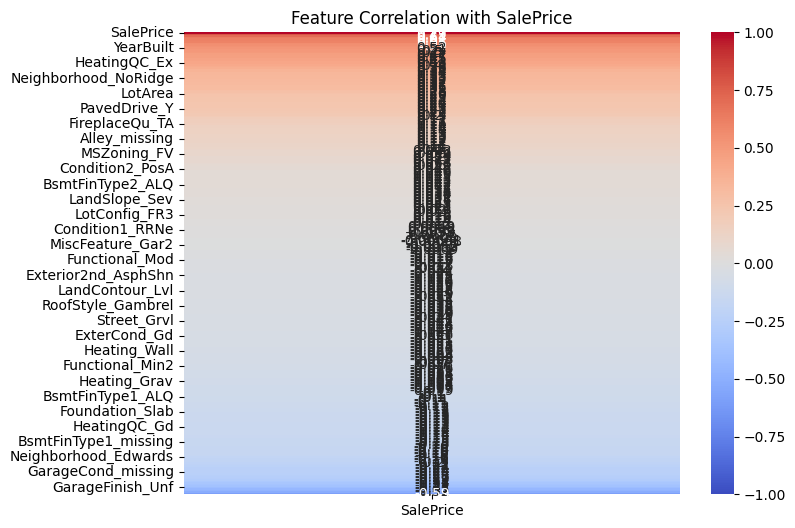

In [33]:
#correlation
plt.figure(figsize=(8,6))

# Correlation matrix
corr = df.corr()

# Select correlations with SalePrice, turn into DataFrame
saleprice_corr = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

# Plot heatmap
sns.heatmap(saleprice_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Feature Correlation with SalePrice")
plt.show()


- **since our heatmap is so  condensed lets see the top 20 most correlated values with SalePrice**

C:\Users\Win\AppData\Local\Temp\ipykernel_15576\1877442840.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm",edgecolor="black")


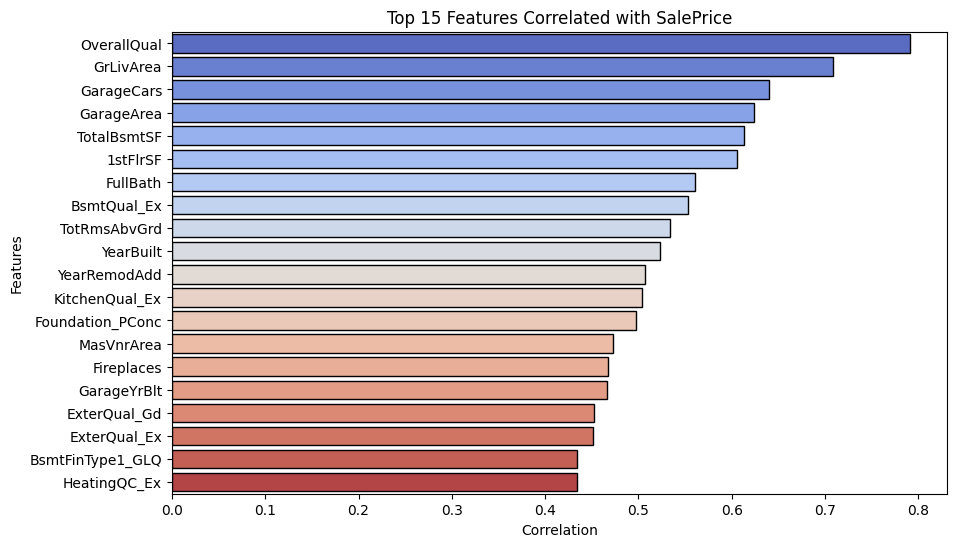

In [34]:
corr = df.corr()['SalePrice'].sort_values(ascending=False)

# Exclude SalePrice itself (first entry)
top_corr = corr.drop('SalePrice').head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm",edgecolor="black")

plt.title("Top 15 Features Correlated with SalePrice")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [38]:
print( top_corr)

OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.472614
Fireplaces          0.466929
GarageYrBlt         0.466754
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
HeatingQC_Ex        0.434543
Name: SalePrice, dtype: float64


# FEATURE ENGINEERING

In [39]:
#Log-transforming skewed numeric features
skewed_feats = ['LotArea', 'GrLivArea', 'TotalBsmtSF']
for feat in skewed_feats:
    df[feat] = np.log1p(df[feat])
    test[feat] = np.log1p(test[feat])

In [40]:
# log-transform target
df['SalePrice_log'] = np.log1p(df['SalePrice'])

In [41]:
#engineering new features
for dataset in [df, test]:
    dataset['TotalSF'] = dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['TotalBsmtSF']
    dataset['TotalBath'] = dataset['FullBath'] + 0.5*dataset['HalfBath'] + dataset['BsmtFullBath'] + 0.5*dataset['BsmtHalfBath']
    dataset['TotalPorchSF'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
    dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['RemodelAge'] = dataset['YrSold'] - dataset['YearRemodAdd']
    dataset['OverallQual_TotalSF'] = dataset['OverallQual'] * dataset['TotalSF']


In [42]:
#Binary\flag features
for dataset in [df, test]:
    dataset['HasPool'] = (dataset['PoolArea'] > 0).astype(int)
    dataset['HasFireplace'] = (dataset['Fireplaces'] > 0).astype(int)
    dataset['IsRemodeled'] = (dataset['YearBuilt'] != dataset['YearRemodAdd']).astype(int)


In [43]:
#grouping rare features
for dataset in [df, test]:
    if 'Neighborhood' in dataset.columns:
        dataset['Neighborhood'] = dataset['Neighborhood'].replace({'MeadowV':'Other', 'IDOTRR':'Other'})


In [44]:
print("Feature engineering complete. Sample of new features:")
print(df[['TotalSF', 'TotalBath', 'HouseAge', 'RemodelAge', 'OverallQual_TotalSF', 'HasPool', 'HasFireplace', 'IsRemodeled']].head())


Feature engineering complete. Sample of new features:
       TotalSF  TotalBath  HouseAge  RemodelAge  OverallQual_TotalSF  HasPool  \
0  1716.753438        3.5         5           5         12017.274065        0   
1  1269.141245        2.5        31          31          7614.847471        0   
2  1792.825460        3.5         7           6         12549.778220        0   
3  1723.629363        2.0        91          36         12065.405543        0   
4  2205.044033        3.5         8           8         17640.352263        0   

   HasFireplace  IsRemodeled  
0             0            0  
1             1            0  
2             1            1  
3             1            1  
4             1            0  


# MODELLING

In [45]:
#importing
from sklearn.model_selection import train_test_split

In [46]:
# Features (drop target and original SalePrice_log if using it)
X = df.drop(columns=['SalePrice','SalePrice_log','Id'])
y = df['SalePrice_log'] 
# Using log-transformed target for better regression performance

In [47]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## a.Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [49]:
# Initialize model
rf = RandomForestRegressor(n_estimators=200, random_state=42)


In [50]:
# Train
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [51]:
# Predict on validation set
y_pred_log = rf.predict(X_val)

In [52]:
# Convert back to original scale
y_pred = np.expm1(y_pred_log)
y_val_actual = np.expm1(y_val)
y_train_actual=np.expm1(y_train)

In [53]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_val_actual, y_pred))
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 30044.76


In [54]:
# lets see interms of percentage how off we are 
mean_target=np.mean(y_train_actual)
relative_rmse=(rmse/mean_target)*100
print("Mean Target:",mean_target)
print("Relative rmse(%):",relative_rmse)

Mean Target: 181441.5419520548
Relative rmse(%): 16.558922179517417


In [55]:
#Prepare test data (drop Id, and SalePrice if it exists)
X_test = test.drop(columns=[c for c in ['Id','SalePrice','SalePrice_log'] if c in test.columns])


In [56]:
#retraining on the full dataset
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X, y)


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [57]:
#predicting in log scale on the test set
y_pred_log = rf.predict(X_test)

In [58]:
#converting back to noriginal scale
y_pred_test=np.expm1(y_pred_log)

In [59]:
# creating a submission file
first_submission = pd.DataFrame({
    "Id": test["Id"],        # ensure "Id" matches Kaggle test file column
    "SalePrice": y_pred_test
})

first_submission.to_csv("first_submission.csv", index=False)


In [60]:
#lets see our prediction mean,our target mean was around 181,000
np.mean(y_pred_test)

176783.9212354213

## b. Light gbm model

In [61]:
!pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
#importing the model
import lightgbm as lgb

In [63]:
#Train LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=32,
    random_state=42
)


In [64]:
#training the model
lgb_model.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4431
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 210
[LightGBM] [Info] Start training from score 12.024057


LGBMRegressor(learning_rate=0.05, n_estimators=1000, num_leaves=32,
              random_state=42)

In [65]:
# Predict
y_pred_log = lgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [66]:
# Submission
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_pred
})

submission.to_csv("submission_lgb.csv", index=False)

print("Submission file created: submission_lgb.csv")


Submission file created: submission_lgb.csv


## Tuning Lightgbm model

In [67]:
from sklearn.model_selection import  RandomizedSearchCV

In [68]:
# Split training set for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Base model
lgb_model = lgb.LGBMRegressor(
    objective="regression",
    metric="rmse",
    boosting_type="gbdt",
    verbosity=-1,
    n_estimators=5000
)

In [70]:
# Parameter grid
param_grid = {
    "num_leaves": [31, 50, 100, 150, 200],
    "max_depth": [-1, 3, 5, 7, 10],
    "learning_rate": [0.01, 0.03, 0.05, 0.07, 0.1],
    "feature_fraction": [0.6, 0.7, 0.8, 0.9, 1.0],
    "bagging_fraction": [0.6, 0.7, 0.8, 0.9, 1.0],
    "min_data_in_leaf": [20, 30, 50, 100]
}


In [71]:
# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=30,   # try 30 random combinations
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [72]:
# Run search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='rmse', n_estimators=5000,
                                           objective='regression',
                                           verbosity=-1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07, 0.1],
                                        'max_depth': [-1, 3, 5, 7, 10],
                                        'min_data_in_leaf': [20, 30, 50, 100],
                                        'num_leaves': [31, 50, 100, 150, 200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [73]:
# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", -random_search.best_score_)


Best Parameters: {'num_leaves': 31, 'min_data_in_leaf': 20, 'max_depth': 3, 'learning_rate': 0.1, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
Best CV Score: 0.12691720095830802


In [74]:
# Train final model on full data with best params
best_params = random_search.best_params_
final_model = lgb.LGBMRegressor(**best_params, objective="regression", metric="rmse", n_estimators=5000)
final_model.fit(X, y)


LGBMRegressor(bagging_fraction=0.8, feature_fraction=0.8, max_depth=3,
              metric='rmse', min_data_in_leaf=20, n_estimators=5000,
              objective='regression')

In [75]:
#Ensuring harmony btwn the train and test data
train_cols = final_model.booster_.feature_name()  # columns used during training
test_cols = test.columns

extra_cols = set(test_cols) - set(train_cols)
missing_cols = set(train_cols) - set(test_cols)

print("Extra columns in test:", extra_cols)
print("Missing columns in test:", missing_cols)


Extra columns in test: {'MSZoning_C (all)', 'Exterior2nd_Wd Shng', 'Id', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Brk Cmn', 'SalePrice'}
Missing columns in test: {'MSZoning_C_(all)', 'Exterior2nd_Wd_Sdng', 'Exterior1st_Wd_Sdng', 'Exterior2nd_Brk_Cmn', 'Exterior2nd_Wd_Shng'}


In [76]:
test = test.drop(columns=list(extra_cols))


In [77]:
for col in missing_cols:
    test[col] = 0  # or np.nan if appropriate


In [78]:
test = test[train_cols]


In [79]:
# Predict on test
y_pred_log = final_model.predict(test)
y_pred = np.expm1(y_pred_log)

In [80]:
# Submission
submission = pd.DataFrame({
    "Id": range(1, len(test) + 1),
    "SalePrice": y_pred
})

submission.to_csv("submission_lgb_tuned.csv", index=False)

print("Submission file created: submission_lgb_tuned.csv")


Submission file created: submission_lgb_tuned.csv


In [81]:
#the mean of our predictions
np.mean(y_pred)

177874.14517351385

 # 📊 Evaluation  

We trained and compared two machine learning models: **Random Forest** and **LightGBM**.  

After submitting predictions to Kaggle, the results were:  

- **Random Forest:** RMSE = `0.13342`  
- **LightGBM:** RMSE = `0.12932`  
- **Tuned LightGBM:** RMSE = **`0.12796`** ✅  

The **tuned LightGBM model** achieved the lowest error and was selected as our final model.  

# 📌 Insights  

**These features were the most positively correlated with our target (SalePrice):**

| Feature            | Correlation |
|--------------------|-------------|
| OverallQual        | 0.790982    |
| GrLivArea          | 0.708624    |
| GarageCars         | 0.640409    |
| GarageArea         | 0.623431    |
| TotalBsmtSF        | 0.613581    |
| 1stFlrSF           | 0.605852    |
| FullBath           | 0.560664    |
| BsmtQual_Ex        | 0.553105    |
| TotRmsAbvGrd       | 0.533723    |
| YearBuilt          | 0.522897    |
| YearRemodAdd       | 0.507100    |
| KitchenQual_Ex     | 0.504094    |
| Foundation_PConc   | 0.497734    |
| MasVnrArea         | 0.472614    |
| Fireplaces         | 0.466929    |
| GarageYrBlt        | 0.466754    |
| ExterQual_Gd       | 0.452466    |
| ExterQual_Ex       | 0.451164    |
| BsmtFinType1_GLQ   | 0.434597    |
| HeatingQC_Ex       | 0.434543    |

- **These were tha key faetures that determined the cost of the house**
- **The quality aspect was the most influential aspect that determine dthe salePrice**

# ✅ CONCLUSION  

- Our project was successful, as we were able to **accurately predict house prices based on the characteristic features of the properties.**

- Through careful data preprocessing, feature engineering, and model experimentation, we identified that a tuned **LightGBM model** delivered the best performance.  

- The analysis not only provided strong predictive accuracy but also revealed valuable insights into the factors that drive housing prices, such as overall quality, living area, and renovation history.

- This demonstrates the potential of machine learning to support data-driven decision making in the real estate domain.  


# NEXT STEPS
- Deployment on streamlit
- we are going to deploy the `model`(**the tuned lightgbm model**)
- **We are going to retrain a model with the top 10 most correlated features**
- **This is simply  because no one wants to input 300+ inputs in a form**
- We will then save our model and deploy


In [86]:
from sklearn.model_selection import  cross_val_score
import joblib



In [87]:
# Target
y = df["SalePrice"]

# Top 10 meaningful features (from your correlation/importance list)
top_features = [
    "OverallQual", 
    "GrLivArea", 
    "GarageCars", 
    "GarageArea", 
    "TotalBsmtSF", 
    "1stFlrSF", 
    "FullBath", 
    "BsmtQual_Ex", 
    "TotRmsAbvGrd", 
    "YearBuilt"
]


In [88]:
X = df[top_features]

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Tuned LightGBM parameters 
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1
}

In [91]:
# Train model
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

In [92]:
model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=100)]
)


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[200]	valid_0's rmse: 32529.3


In [93]:
# Evaluate
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 32529.271813978925


In [94]:
# Save model & feature list
joblib.dump(model, "model.pkl")
joblib.dump(top_features, "train_columns.pkl")


['train_columns.pkl']